In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Error Probabilities

In the process by which we decide which of two hypotheses is better supported by our data, the final step involves a judgment about the consistency of the data and the null hypothesis. While this step results in a good decision a vast majority of the time, it can sometimes lead us astray. The reason is chance variation. For example, even when the null hypothesis is true, chance variation might cause the sample to look quite different from what the null hypothesis predicts. 

## Wrong Conclusions

If you are testing a null hypothesis against the alternative that the null hypothesis isn't true, then there are four ways of classifying reality and the result of the test.

|     | Test Favors the Null | Test Favors the Alternative |
|----:|:-----------------------|:------------------------|
|**Null is True**| Correct result | Error |
|**Alternative is True**| Error | Correct result |

In two out of the four cells of this table, the test result is wrong. One type of error occurs if the test favors the alternative hypothesis when in fact the null hypothesis is true. The other type of error occurs if the test favors the null hypothesis when in fact the alternative hypothesis is true.

Since the null hypothesis is a completely specified chance model, the first type of error has a chance that we can estimate. The answer turns out to be essentially the cutoff that we use for the p-value. Let's see how.

## The Chance of an Error
Suppose you want to test whether a coin is fair or not. Then the hypotheses are:

**Null:** The coin is fair. That is, the results are like draws made at random with replacement from *Heads, Tails*.

**Alternative:** The coin is not fair.

Suppose you are going to test this hypothesis based on 2000 tosses of the coin. You would expect a fair coin to land heads 1000 times out of 2000, so a reasonable test statistic to use is

$$
\text{test statistic} ~ = ~ \big{\vert} ~ \text{number of heads} - 1000 ~ \big{\vert}
$$

Small values of this statistic favor the null hypothesis, and large values favor the alternative.

We have simulated this statistic under the null hypothesis many times, and drawn its empirical distribution.

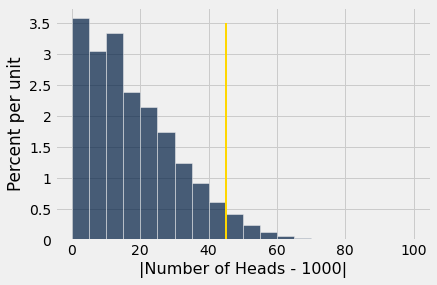

In [2]:
fair_coin = [0.5, 0.5]

def one_simulated_statistic():
    number_of_heads = 2000 * sample_proportions(2000, fair_coin).item(0)
    #number_of_heads = sum(np.random.choice(fair_coin, 2000))
    return abs(number_of_heads - 1000)

repetitions = 50000

statistics = make_array()
for i in np.arange(50000):
    statistics = np.append(statistics, one_simulated_statistic())

results = Table().with_column('|Number of Heads - 1000|', statistics)
results.hist(bins = np.arange(0, 101, 5))
plots.plot([45, 45], [0, 0.035], color='gold', lw=2);

The area to the right of 45 (where the gold line is) is just under 5%. 

In [3]:
np.count_nonzero(statistics >= 45) / repetitions

0.04746

Large values of the test statistic favor the alternative. So if you wanted to use a 5% cutoff for the p-value, your decision rule would be to conclude that the coin is unfair if the test statistic comes out to be 45 or more. 

However, as the figure shows, a fair coin can produce test statistics with values 45 or more. In fact it does so with chance approximately 5%.

Summary: *If the coin is fair* and our test uses a 5% cutoff for deciding whether it is fair or not, then there is about a 5% chance that the test will wrongly conclude that the coin is unfair.

## The Cutoff for the p-value is an Error Probability
The example above is a special case of a general fact:

**If you use a $p$% cutoff for the p-value, and the null hypothesis happens to be true, then there is about a $p$% chance that your test will conclude that the alternative is true.**

Here is the table of the four possible reality/test outcomes again. Probabilities in the top row are computed under the assumption that the null hypothesis is true. The p-value is the probability of the error shown in red.

|     | Test Favors the Null | Test Favors the Alternative |
|----:|:-----------------------|:------------------------|
|**Null is True**| Correct result | <p style="color:red;"><b>Error</b></p> |
|**Alternative is True**| Error | Correct result |

### Controlling for the Error ###
The 1% cutoff is therefore more conservative than 5%. With the 1% cutoff there is less chance of concluding "alternative" if the null happens to be true. For this reason, randomized controlled trials of medical treatments usually use 1% as the cutoff for deciding between the following two hypotheses:

**Null:** The treatment has no effect; the observed differences between the outcomes of the treatment and control groups of patients are due to randomization.

**Alternative:** The treatment has an effect.

The idea is to control the chance of concluding that the treatment does something if in fact it does nothing. This reduces the risk of giving patients a useless treatment.

Still, even if you set the cutoff to be as low as 1%, and the treatment does nothing, there is about a 1% chance of concluding that the treatment does something. This is due to chance variation. There is a small chance that data from random samples end up leading you astray. The advantage of random sampling is that you can find that chance.

## Data Snooping and p-Hacking
The discussion above implies that if each of 100 different research groups runs a separate randomized controlled experiment about the effect of a treatment that in fact has no effect, and each experiment uses a 1% cutoff for the p-value, then by chance variation, one of the experiments is expected to wrongly conclude that the treatment does have an effect.

Unfortunately, that could be the one that gets published. This is why it is important that experiments be *replicated*. That is, other researchers ought to be able to carry out the experiment and see if they get similar results.

It is not uncommon for researchers to test multiple hypotheses using the same data. For example, in a randomized controlled trial about the effect of a drug, researchers might test whether the drug has an effect on various different diseases. 

Now suppose the drug has no effect on anything. Just by chance variation, a small percent of the tests might conclude that it does have an effect. So, when you read a study that uses tests of hypotheses and concludes that a treatment has an effect, always ask how many different effects were tested before the researchers found the one that was reported.

If the researchers ran multiple different tests before finding one that gave a "highly statistically significant" result, use the result with caution. The study could be marred by *data snooping*, which essentially means torturing the data into making a false confession. This is sometimes also called *p-hacking*.

In such a situation, one way to validate the reported result is by replicating the experiment and testing for that particular effect alone. If it comes out significant again, that will validate the original conclusion.

## Technical Note: The Other Kind of Error
There is, of course, another kind of error: concluding that the treatment does nothing when in fact it does something. Discussions of that error are outside the scope of this course. Just be aware that life isn't easy: if you set up your test to reduce one of the two errors, you almost always increase the other one. 